In [1]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
# Read the train and test data
train=pd.read_csv("train_HK6lq50.csv")
test=pd.read_csv("test_2nAIblo.csv")

In [3]:
# Check the variables in train data
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [4]:
# Print datatype of each variable
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [7]:
# Dimension of the train dataset
train.shape

(73147, 16)

In [8]:
# Print the head of train dataset
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [10]:
# Unique values in each variable of train dataset
train.nunique()

id                           73147
program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             45
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating        5
is_pass                          2
dtype: int64

### Univariate Analysis

#### Target Variable

In [11]:
train['is_pass'].value_counts(normalize=True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

In [12]:
# Around 70% trainee have passed the test

#### Categorical Independent Variables

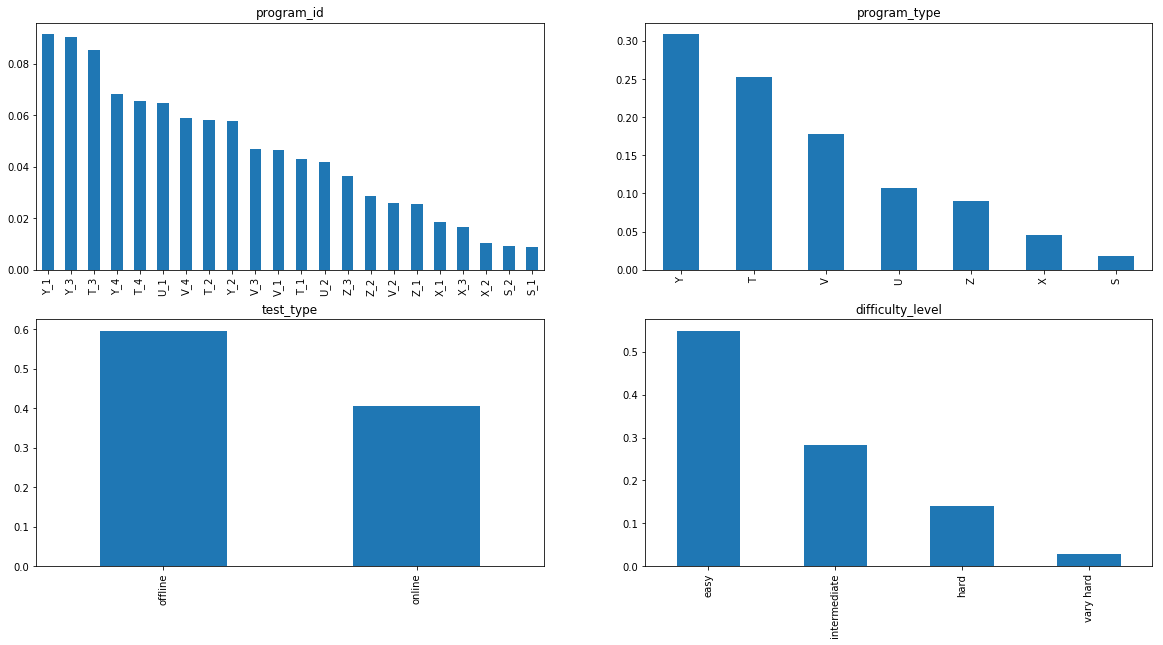

In [13]:
plt.figure(1)
plt.subplot(221)
train['program_id'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'program_id')

plt.subplot(222)
train['program_type'].value_counts(normalize=True).plot.bar(title= 'program_type')

plt.subplot(223)
train['test_type'].value_counts(normalize=True).plot.bar(title= 'test_type')

plt.subplot(224)
train['difficulty_level'].value_counts(normalize=True).plot.bar(title= 'difficulty_level')

plt.show()

In [14]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

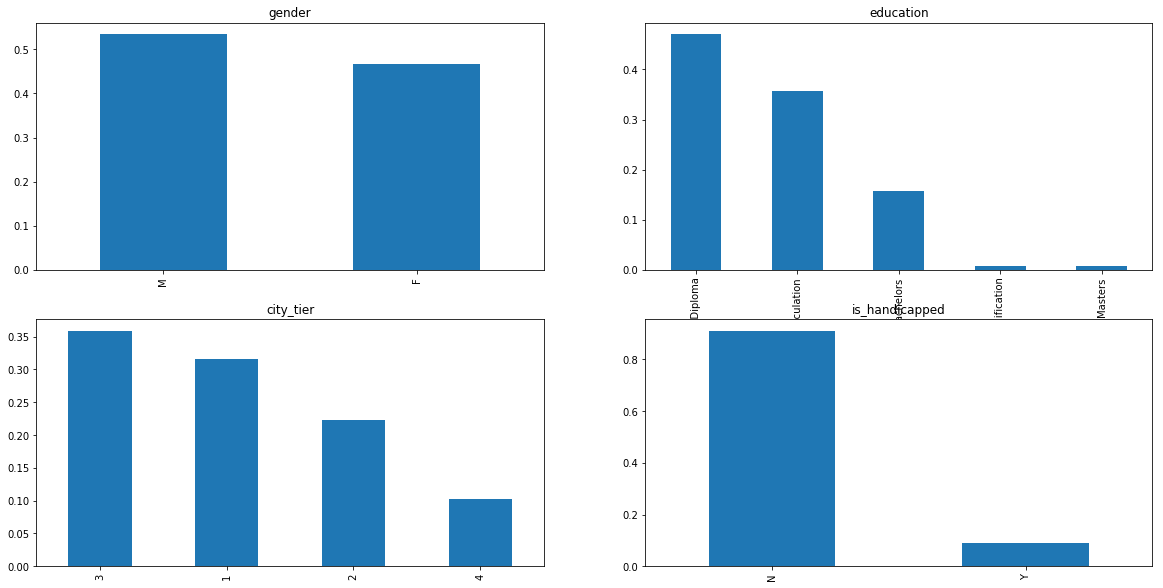

In [15]:
plt.figure(1)
plt.subplot(221)
train['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'gender')

plt.subplot(222)
train['education'].value_counts(normalize=True).plot.bar(title= 'education')

plt.subplot(223)
train['city_tier'].value_counts(normalize=True).plot.bar(title= 'city_tier')

plt.subplot(224)
train['is_handicapped'].value_counts(normalize=True).plot.bar(title= 'is_handicapped')

plt.show()

In [16]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

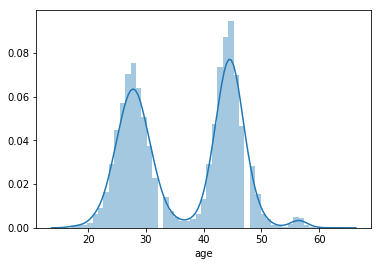

In [17]:
df=train.dropna()
sns.distplot(df['age']);

In [18]:
# Most of the trainee are in the age range of 20-30 and 40-50

### Bivariate Analysis

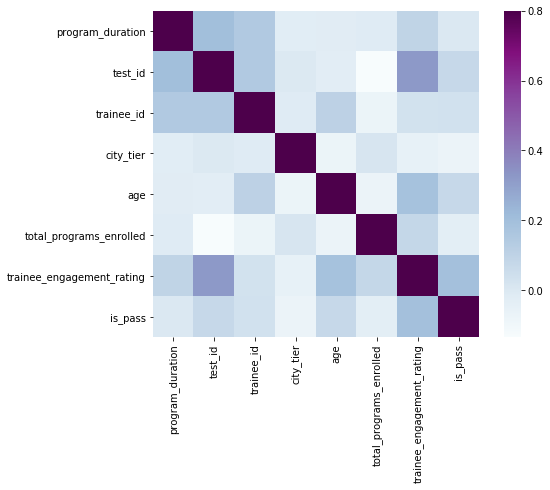

In [19]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [20]:
# Not much correlation between the variables

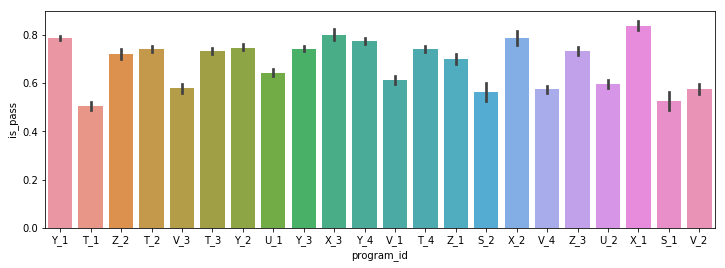

In [21]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['program_id'], train['is_pass'])

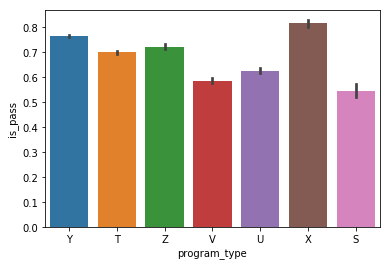

In [22]:
# program_type vs is_pass
sns.barplot(train['program_type'], train['is_pass'])

In [23]:
# Trainee in X and Y program type have higher chances to pass the test

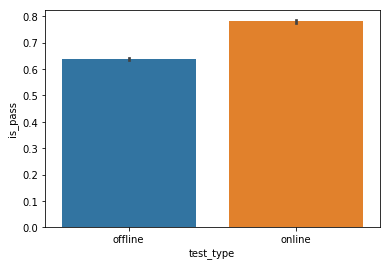

In [24]:
# test_type vs is_pass
sns.barplot(train['test_type'], train['is_pass'])

In [25]:
# Trainee attending online mode of test have higher chances to pass the test

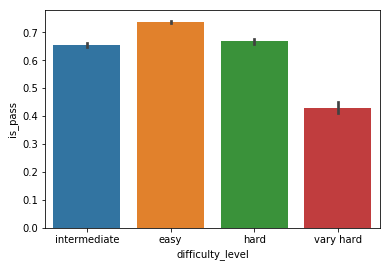

In [26]:
# difficulty_level vs is_pass
sns.barplot(train['difficulty_level'], train['is_pass'])

In [27]:
# If the difficulty level of the test is easy, chances to pass the test are higher

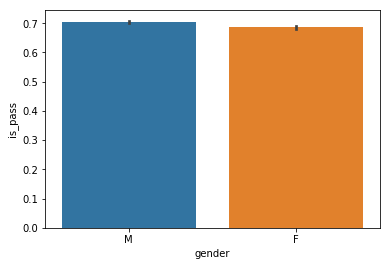

In [28]:
# Gender vs is_pass
sns.barplot(train['gender'], train['is_pass'])

In [29]:
# Gender does not affect the chances to pass the test

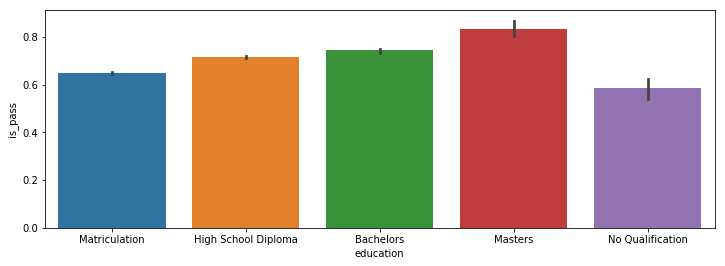

In [30]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_pass'])

In [31]:
# Trainee with Masters education level have more chances to pass the test

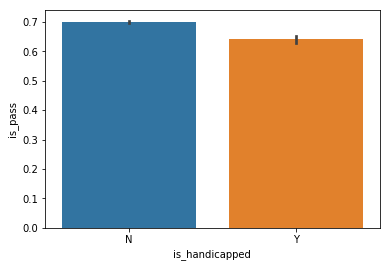

In [32]:
# is_handicapped vs is_pass
sns.barplot(train['is_handicapped'], train['is_pass'])

In [33]:
# Handicapped trainee have less chances to pass the test

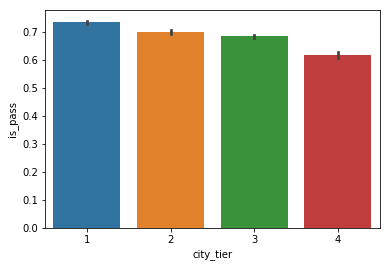

In [34]:
# city_tier vs is_pass
sns.barplot(train['city_tier'], train['is_pass'])

In [35]:
# Trainee from city tier 1 have higher chances to pass the test

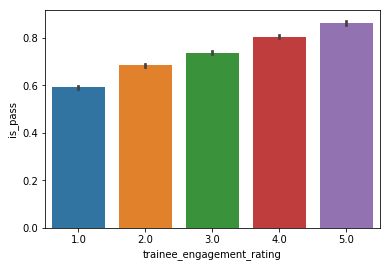

In [36]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['trainee_engagement_rating'], train['is_pass'])

In [37]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [38]:
# Check the number of missing values in each variable
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [39]:
# age and trainee_engagement_rating variables have missing values in it.

In [40]:
# Imputing missing value in age variable with median and in trainee_engagement_rating variable with mode of that variable.
train['age'].fillna(train['age'].median(), inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)
test['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)

### Logistic Regression

In [41]:
# Dropping id variables
train=train.drop(['id', 'trainee_id', 'test_id'], axis=1)
test=test.drop(['id', 'trainee_id', 'test_id'], axis=1)

In [42]:
# Save target variable in separate dataset
X = train.drop('is_pass',1)
y = train.is_pass

In [43]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [45]:
# Logistic regression using 5 fold stratified cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data
pred=model.predict_proba(test)[:,1]


1 of kfold 5
roc_auc_score 0.7001069408450943

2 of kfold 5
roc_auc_score 0.6998057740556684

3 of kfold 5
roc_auc_score 0.7012574737119643

4 of kfold 5
roc_auc_score 0.7115853212493874

5 of kfold 5
roc_auc_score 0.6999818534329174


In [46]:
# Read the submission file
submission=pd.read_csv("sample_submission_vaSxamm.csv")

In [47]:
submission.head()

,id,is_pass
0,1626_45,0
1,11020_130,0
2,12652_146,0
3,7038_72,0
4,888_71,0


In [48]:
# Fill the is_pass variable with the predictions
submission['is_pass']=pred

In [49]:
# Converting the submission file to csv format
submission.to_csv('logistic_submission.csv', index=False)

score on leaderboard - 0.71145